In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Mounted at /content/drive
/content/drive


In [2]:
import pandas as pd

trainPath = '/content/drive/MyDrive/ML_Project/training.csv'
df = pd.read_csv(trainPath)

#droping columns - state, Next_Year_Crime_Rate
df1 = df.drop(['state', 'Next_Year_Crime_Rate'], axis=1)

from sklearn.model_selection import train_test_split
import numpy as np

x = df1.drop('Next_Year_Top_10',axis=1).to_numpy()
y = df1['Next_Year_Top_10'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y)

Scaling - Standard Scaler

In [50]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)


##*Calculating optimal K on training data* 

Minimum error= 0.08378378378378379 at K = 5


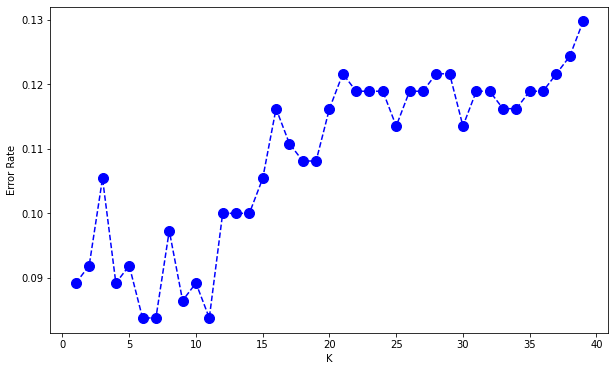

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.ticker as ticker
%matplotlib inline

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)

 #calculating error rate
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)

plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error=",min(error_rate),"at K =",error_rate.index(min(error_rate)))

### Scaling down *years*

In [58]:
import pandas as pd

trainPath = '/content/drive/MyDrive/ML_Project/training.csv'
df_train = pd.read_csv(trainPath)

testPath = '/content/drive/MyDrive/ML_Project/testing.csv'
df_test = pd.read_csv(testPath)

#droping columns - state, Next_Year_Crime_Rate
train = df_train.drop(['state', 'Next_Year_Crime_Rate'], axis=1)
test = df_test.drop(['state', 'Next_Year_Crime_Rate'], axis=1)

In [59]:
x_train1 = train.drop(['Next_Year_Top_10'], axis = 1)
x_test1 = test.drop(['Next_Year_Top_10'], axis=1)

y_train1 = train['Next_Year_Top_10']
y_test1 = test['Next_Year_Top_10']

In [60]:
x_train1["year"] = [(1 + (i-1980)) for i in x_train1["year"]]
x_test1["year"] = [(1 + (i-1980)) for i in x_test1["year"]]

KNN with k = 5

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train1.values,y_train1.values)

In [72]:
pred = knn1.predict(x_test1.values)

In [73]:
#Evaluation
from sklearn.metrics import hamming_loss, classification_report
hloss2 = hamming_loss(y_test1, pred)

print(f'Hamming Loss: {hloss2} \n\n')
print(classification_report(y_test1, pred))

Hamming Loss: 0.16862745098039217 


              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       205
         1.0       0.62      0.36      0.46        50

    accuracy                           0.83       255
   macro avg       0.74      0.65      0.68       255
weighted avg       0.81      0.83      0.81       255

